# Transfer Learning with AutoEncoders

In [ ]:
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as plt
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#Testing the model that I am willing to use later for benchmarking
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 1.6352 - accuracy: 0.5029 - val_loss: 0.8810 - val_accuracy: 0.7198
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8354 - accuracy: 0.7261 - val_loss: 0.7088 - val_accuracy: 0.7626
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6961 - accuracy: 0.7694 - val_loss: 0.6324 - val_accuracy: 0.7862
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6284 - accuracy: 0.7932 - val_loss: 0.5889 - val_accuracy: 0.8022
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5895 - accuracy: 0.8037 - val_loss: 0.5598 - val_accuracy: 0.8138
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5655 - accuracy: 0.8139 - val_loss: 0.5402 - val_accuracy: 0.8196
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5363 - accuracy: 0.8205 - val_loss: 0.5188 - val_accuracy

In [ ]:
history.history

{'loss': [1.2813036441802979,
  0.7952855825424194,
  0.6814340353012085,
  0.6215713620185852,
  0.582679271697998,
  0.5547453761100769,
  0.5337578654289246,
  0.5172617435455322,
  0.5036124587059021,
  0.4920738935470581],
 'accuracy': [0.6225273013114929,
  0.7368545532226562,
  0.7721090912818909,
  0.7947636246681213,
  0.8079817891120911,
  0.8166727423667908,
  0.8218363523483276,
  0.8268908858299255,
  0.8300363421440125,
  0.833690881729126],
 'val_loss': [0.8809624314308167,
  0.7087973356246948,
  0.6324403285980225,
  0.5888940691947937,
  0.55977463722229,
  0.5402117967605591,
  0.5187808871269226,
  0.5060600638389587,
  0.4946977198123932,
  0.48364824056625366],
 'val_accuracy': [0.7197999954223633,
  0.7626000046730042,
  0.7861999869346619,
  0.8022000193595886,
  0.8137999773025513,
  0.819599986076355,
  0.8252000212669373,
  0.8274000287055969,
  0.8259999752044678,
  0.8302000164985657]}

In [ ]:
num_iterations = len(X_train)
i=100
benchmark =[]
while i< num_iterations:
    model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")])
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
    history = model.fit(X_train[:i], y_train[:i], epochs=10,validation_data=(X_valid, y_valid))
    benchmark += [history.history["accuracy"][-1]]
    i = i*2

Epoch 1/10
4/4 [==============================] - 2s 407ms/step - loss: 2.2749 - accuracy: 0.0890 - val_loss: 2.3266 - val_accuracy: 0.1042
Epoch 2/10
4/4 [==============================] - 1s 169ms/step - loss: 2.2395 - accuracy: 0.1200 - val_loss: 2.3043 - val_accuracy: 0.1138
Epoch 3/10
4/4 [==============================] - 1s 180ms/step - loss: 2.2564 - accuracy: 0.1332 - val_loss: 2.2941 - val_accuracy: 0.1276
Epoch 4/10
4/4 [==============================] - 1s 197ms/step - loss: 2.1959 - accuracy: 0.2208 - val_loss: 2.2745 - val_accuracy: 0.1432
Epoch 5/10
4/4 [==============================] - 1s 173ms/step - loss: 2.1879 - accuracy: 0.2062 - val_loss: 2.2592 - val_accuracy: 0.1516
Epoch 6/10
4/4 [==============================] - 1s 167ms/step - loss: 2.1881 - accuracy: 0.1977 - val_loss: 2.2460 - val_accuracy: 0.1626
Epoch 7/10
4/4 [==============================] - 1s 196ms/step - loss: 2.1688 - accuracy: 0.2217 - val_loss: 2.2376 - val_accuracy: 0.1682
Epoch 8/10
4/4 [====

100/100 [==============================] - 1s 10ms/step - loss: 1.1047 - accuracy: 0.6784 - val_loss: 1.0503 - val_accuracy: 0.6978
Epoch 10/10
100/100 [==============================] - 1s 10ms/step - loss: 1.0399 - accuracy: 0.6965 - val_loss: 1.0089 - val_accuracy: 0.7084
Epoch 1/10
200/200 [==============================] - 3s 10ms/step - loss: 2.2437 - accuracy: 0.2509 - val_loss: 1.7764 - val_accuracy: 0.4876
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 1.7013 - accuracy: 0.5364 - val_loss: 1.4808 - val_accuracy: 0.6162
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 1.4095 - accuracy: 0.6350 - val_loss: 1.2819 - val_accuracy: 0.6606
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 1.2306 - accuracy: 0.6742 - val_loss: 1.1360 - val_accuracy: 0.6884
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 1.1017 - accuracy: 0.6949 - val_loss: 1.0351 - val_accuracy: 0.7066
Epoch 6/10
20

Printing the accuracy of the model on different training sizes.

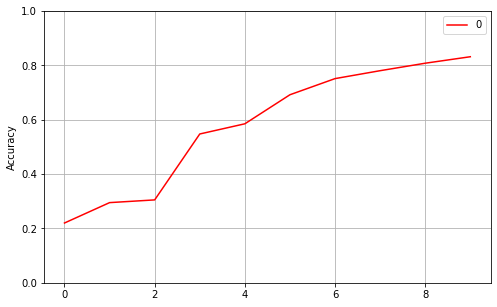

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(benchmark).plot(figsize=(8, 5), color ='red')
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(True)

In [ ]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

simple_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="sigmoid"),
])
simple_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
simple_ae = keras.models.Sequential([simple_encoder, simple_decoder])
simple_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.),
                  metrics=[rounded_accuracy])
history = simple_ae.fit(X_train, X_train, epochs=16,
                        validation_data=(X_valid, X_valid))

Epoch 1/16
1719/1719 [==============================] - 12s 6ms/step - loss: 0.4881 - rounded_accuracy: 0.7467 - val_loss: 0.3814 - val_rounded_accuracy: 0.8464
Epoch 2/16
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3722 - rounded_accuracy: 0.8553 - val_loss: 0.3561 - val_rounded_accuracy: 0.8762
Epoch 3/16
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3481 - rounded_accuracy: 0.8797 - val_loss: 0.3406 - val_rounded_accuracy: 0.8859
Epoch 4/16
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3356 - rounded_accuracy: 0.8897 - val_loss: 0.3294 - val_rounded_accuracy: 0.8959
Epoch 5/16
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3250 - rounded_accuracy: 0.8986 - val_loss: 0.3217 - val_rounded_accuracy: 0.9022
Epoch 6/16
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3199 - rounded_accuracy: 0.9027 - val_loss: 0.3182 - val_rounded_accuracy: 0.9040
Epoch 7/16
1719/1719 [============

In [ ]:
simple_ae.save("AutoEncoder.h5")

In [ ]:
model_A = keras.models.clone_model(simple_encoder)
model_A.set_weights(simple_encoder.get_weights())
model_A.add(keras.layers.Dense(300, activation="selu", input_shape=[30]))
for n_hidden in (100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="relu"))   

Now you could train model_B_on_A for task B, but since the new output
layer was initialized randomly it will make large errors (at least during the
first few epochs), so there will be large error gradients that may wreck the
reused weights. To avoid this, one approach is to freeze the reused layers
during the first few epochs, giving the new layer some time to learn
reasonable weights. To do this, set every layer’s trainable attribute to
False and compile the model:

In [ ]:
for layer in model_A.layers[:4]:
    layer.trainable = False
    # freezing the encoder layers

model_A.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [ ]:
model_A.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_42 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_166 (Dense)            (None, 300)               9300      
_________________________________________________________________
dense_167 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_168 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_169 (Dense)            (None, 50)              

In [ ]:
history = model_A.fit(X_train, y_train, epochs=8,
                           validation_data=(X_valid, y_valid))

# this only trains the newly created layers. 
# I just need to verify that the model is working correctly with its loss function

Epoch 1/8
1719/1719 [==============================] - 8s 4ms/step - loss: 2.2677 - accuracy: 0.4594 - val_loss: 2.2630 - val_accuracy: 0.4744
Epoch 2/8
1719/1719 [==============================] - 8s 4ms/step - loss: 2.2284 - accuracy: 0.4755 - val_loss: 2.2256 - val_accuracy: 0.4836
Epoch 3/8
1719/1719 [==============================] - 7s 4ms/step - loss: 2.1956 - accuracy: 0.4878 - val_loss: 2.1954 - val_accuracy: 0.4920
Epoch 4/8
1719/1719 [==============================] - 7s 4ms/step - loss: 2.1676 - accuracy: 0.4969 - val_loss: 2.1701 - val_accuracy: 0.4962
Epoch 5/8
1719/1719 [==============================] - 7s 4ms/step - loss: 2.1441 - accuracy: 0.4997 - val_loss: 2.1495 - val_accuracy: 0.4990
Epoch 6/8
1719/1719 [==============================] - 7s 4ms/step - loss: 2.1251 - accuracy: 0.5026 - val_loss: 2.1335 - val_accuracy: 0.4982
Epoch 7/8
1719/1719 [==============================] - 8s 4ms/step - loss: 2.1097 - accuracy: 0.5048 - val_loss: 2.1204 - val_accuracy: 0.4982

In [ ]:
for layer in model_A.layers:
    layer.trainable = True

model_A.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

# model_A.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                 optimizer=keras.optimizers.SGD(lr=1e-3),
#                 metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model_A.fit(X_train, y_train, epochs=16,
                           validation_data=(X_valid, y_valid))

Epoch 1/16
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7847 - accuracy: 0.7972 - val_loss: 0.8031 - val_accuracy: 0.7860
Epoch 2/16
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7910 - accuracy: 0.7955 - val_loss: 0.7954 - val_accuracy: 0.7868
Epoch 3/16
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7898 - accuracy: 0.7979 - val_loss: 0.7887 - val_accuracy: 0.7920
Epoch 4/16
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7702 - accuracy: 0.8024 - val_loss: 0.7856 - val_accuracy: 0.7916
Epoch 5/16
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7757 - accuracy: 0.7985 - val_loss: 0.7803 - val_accuracy: 0.7940
Epoch 6/16
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7788 - accuracy: 0.7999 - val_loss: 0.7783 - val_accuracy: 0.7944
Epoch 7/16
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7693 - accuracy: 0.8013 - val_loss: 0.7765 - val_accurac

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    X_train, y_train,
    epochs=4,
    validation_data=(X_valid, y_valid),
)

Epoch 1/4
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6459 - sparse_categorical_accuracy: 0.7793 - val_loss: 0.4485 - val_sparse_categorical_accuracy: 0.8312
Epoch 2/4
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3921 - sparse_categorical_accuracy: 0.8599 - val_loss: 0.3749 - val_sparse_categorical_accuracy: 0.8610
Epoch 3/4
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3460 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.3554 - val_sparse_categorical_accuracy: 0.8716
Epoch 4/4
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3143 - sparse_categorical_accuracy: 0.8863 - val_loss: 0.3297 - val_sparse_categorical_accuracy: 0.8844


Compared to a normal neural network, it is almost as efficient. Maybe auto-encoders aren't that helpful?

### Progress and notes:

1) raise ValueError("logits and labels must have the same shape (%s vs %s)" % ValueError: logits and labels must have the same shape
--------------------((None, 8) vs (None, 1))

Solution: do not use a sigmoid function at the end with a single neuron. That means the model is a binary classifier which is not what we want.
Solution_Time = 1.5 hour(s)


2) Model is being trained from the beginning, as if it were never trained before.

Solution: clone_model() does not clone weights!!! I have to not only copy the model, but also copy the weights. I used to save the model, then load it again, but I have discovered a way to copy the weights easily.
Solution_Time = 4 hour(s)

3) accuracy converges to 0.1

Solution: I have to freeze the newly created layers first, or else the model will collapse, or get stuck on a local minimum!
Solution_Time = 1 hour(s)

4) accuracy converges to 0.0000e+00 

model_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
                     
Solution: it seems using the binary_crossentropy as a loss function makes the model the worst. I thought since it is a classification problem binary crossentropy would not ne a problem. But for some reason, it is !?
Solution_Time = 3 hour(s)

5) low performance : stuck at 50%, then 60%. Now stuck at 80%.

Solution: First, I tried freezing layer per layer, until I eventually froze all transfered layers as this step made the performance go from 50% to 60% accuracy. Then I tried to change the learning rate from the compilation with frozen layers to the compilation of all layers. This has pushed the performance from 60% to 80%. I tried replacing the top layer or dropping it, but performance would not really change. 
Solution_Time =  3 hour(s)